<a href="https://colab.research.google.com/github/atpathak/DeepLearning_code-templates_2026/blob/main/Hybrid_DL_SOM_ANN_FraudAnalysis1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
!pip install MiniSom

  Preparing metadata (setup.py) ... done
  Created wheel for MiniSom: filename=MiniSom-2.3.6-py3-none-any.whl size=13083 sha256=ae76610f1f6ef9b877b3c9eb1fc90626be18b0e1dd2cb50a3d907f7e77f8f2ad
  Stored in directory: /root/.cache/pip/wheels/84/35/b8/48b06bd8cae7187916c28a29c6daa9e0ff610647a2dfa62b97
Successfully built MiniSom


Self Organizing maps to know frauds

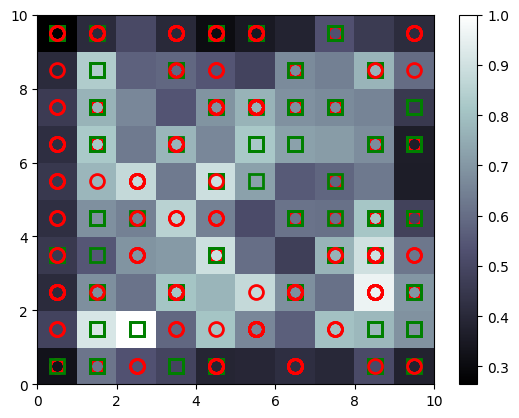

In [2]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration=100)

from pylab import bone, pcolor, colorbar, plot, show

bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
  w = som.winner(x)
  plot(w[0] + 0.5,
       w[1] + 0.5,
       markers[y[i]],
       markeredgecolor = colors[y[i]],
       markerfacecolor = 'None',
       markersize = 10,
       markeredgewidth = 2)
show()

In [3]:
mappings = som.win_map(X)
frauds =  np.concatenate((mappings[(2, 1)], mappings[(8, 2)]), axis = 0)
frauds = sc.inverse_transform(frauds)

Going from unsupervised to supervised Model

In [5]:
# independent variables
customers = dataset.iloc[:,1:].values

In [6]:
#dependent variable
is_fraud = np.zeros(len(dataset))
for i in range(len(dataset)):
  if dataset.iloc[i,0] in frauds:
    is_fraud[i] = 1

Now Artificial Neural Newtork

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
customers = sc.fit_transform(customers)

import tensorflow as tf

ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=2, kernel_initializer = 'uniform', activation='relu', input_dim = 15)) # first hidden layer


ann.add(tf.keras.layers.Dense(units=1, kernel_initializer = 'uniform', activation='sigmoid')) # output layer

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

ann.fit(customers, is_fraud, batch_size = 1, epochs = 2)

Epoch 1/2


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


690/690 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9772 - loss: 0.5944
Epoch 2/2
690/690 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9772 - loss: 0.2292


In [9]:
#predict the probability for fraud
y_pred = ann.predict(customers)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [10]:
y_pred = np.concatenate((dataset.iloc[:, 0:1].values, y_pred), axis = 1)

In [12]:
y_pred = y_pred[y_pred[:, 1].argsort()]

In [13]:
y_pred

array([[1.56458200e+07, 2.51033567e-02],
       [1.56444460e+07, 2.64289714e-02],
       [1.57140870e+07, 2.64833253e-02],
       ...,
       [1.56921370e+07, 2.92233825e-01],
       [1.57901130e+07, 3.05518061e-01],
       [1.57672640e+07, 3.05518061e-01]])